In [12]:
from nltk.corpus import treebank
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import nltk
import json

In [13]:
def get_user_name(url):
    parts = url.split('/')
    fname = parts[-1]
    uname = fname.rstrip('_log.csv')
    return uname


In [14]:
#combine all 'State' and 'Action' fields to a single dataframe making each as a string
#make array like this and add to that [('Pierre', 'NNP'),
from nltk.tag import hmm

# tagged_sentence = []
# hyperparam_file='sampled-hyperparameters-config.json'
# with open(hyperparam_file) as f:
#         hyperparams = json.load(f)
# threshold = hyperparams['threshold'][1:len(hyperparams['threshold'])-1]

threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]



interaction_file_path_movies= { 'p4': np.sort(glob.glob("data/zheng/processed_interactions_p4/*")),
                                 'p3': np.sort(glob.glob("data/zheng/processed_interactions_p3/*")),
                                 'p2': np.sort(glob.glob("data/zheng/processed_interactions_p2/*")),
                                    'p1': np.sort(glob.glob("data/zheng/processed_interactions_p1/*"))
                }

interaction_file_path_birdstrikes= { 'p4': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p4/*")),
                                    'p3': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p3/*")),
                                    'p2': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p2/*")),
                                        'p1': np.sort(glob.glob("data/zheng/birdstrikes_processed_interactions_p1/*"))
                }

save_path_movies ={ 'p4': 'Experiments_Folder/VizRec/movies/p4',
                    'p3': 'Experiments_Folder/VizRec/movies/p3',
                    'p2': 'Experiments_Folder/VizRec/movies/p2',
                    'p1': 'Experiments_Folder/VizRec/movies/p1'
                }

save_path_birdstikes ={ 'p4': 'Experiments_Folder/VizRec/birdstrikes/p4',
                    'p3': 'Experiments_Folder/VizRec/birdstrikes/p3',
                    'p2': 'Experiments_Folder/VizRec/birdstrikes/p2',
                    'p1': 'Experiments_Folder/VizRec/birdstrikes/p1'
                }


In [15]:
#store result in dataframe
 # Create result DataFrame with columns for relevant statistics
for task in ['p4']:
    print('##################################### Processing task:',task)
    result_dataframe = pd.DataFrame()
    for user in interaction_file_path_movies[task]:
        print('##################################### Processing user:',user)
        all_csv = pd.read_csv(user)
        user_tagged_sentence = []
        for i in range(len(all_csv['State'])):
            user_tagged_sentence.append((all_csv['State'][i], all_csv['Action'][i]))



        for thres in threshold:
            print('##################################### Processing Threshold:',thres)
            trainer = nltk.HiddenMarkovModelTagger.train([user_tagged_sentence[:int(thres*len(user_tagged_sentence))+1]])
            print(trainer)
            accuracy = trainer.accuracy([user_tagged_sentence[int(thres*len(user_tagged_sentence))-1:]])
            trainer.evaluate_per_tag([user_tagged_sentence[int(thres*len(user_tagged_sentence))-1:]]) #this will give the confusion matrix
            name=get_user_name(user)
            # accuracy = np.mean(np.array(true_tag) == np.array(predicted_tag))
            print('User:',name,'Threshold:',thres,'Accuracy:',accuracy)
            data={'User':name,'Accuracy':accuracy,'Threshold':thres,'LearningRate': 0 ,'Discount': 0,'Algorithm': 'HMM'}
            result_dataframe = pd.concat([result_dataframe, pd.DataFrame(data, index=[0])], ignore_index=True)
    result_dataframe.to_csv(save_path_movies[task]+'/HMM.csv',index=False)
    print('##################################### Saved task:',task)






##################################### Processing task: p1
##################################### Processing user: data/zheng/processed_interactions_p1/pro13_ace_p1_logs.csv
##################################### Processing Threshold: 0.1
<HiddenMarkovModelTagger 2 states and 2 output symbols>
User: pro13_ace_p1 Threshold: 0.1 Accuracy: 0.4583333333333333
##################################### Processing Threshold: 0.2
<HiddenMarkovModelTagger 2 states and 2 output symbols>
User: pro13_ace_p1 Threshold: 0.2 Accuracy: 0.5238095238095238
##################################### Processing Threshold: 0.3
<HiddenMarkovModelTagger 2 states and 3 output symbols>
User: pro13_ace_p1 Threshold: 0.3 Accuracy: 0.15789473684210525
##################################### Processing Threshold: 0.4
<HiddenMarkovModelTagger 2 states and 5 output symbols>
User: pro13_ace_p1 Threshold: 0.4 Accuracy: 1.0
##################################### Processing Threshold: 0.5
<HiddenMarkovModelTagger 2 states and 5 output

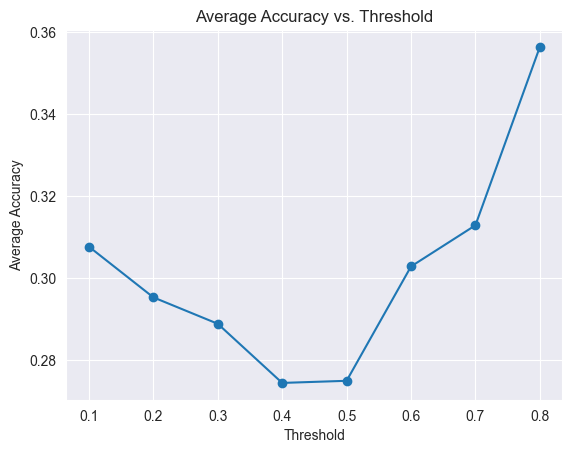

In [16]:

# Group by Threshold and calculate average Accuracy
average_accuracy = result_dataframe.groupby('Threshold')['Accuracy'].mean()

# Plot the average accuracy
plt.plot(average_accuracy.index, average_accuracy.values, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Threshold')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Show the plot
plt.grid(True)
plt.show()


In [17]:
#store result in dataframe
 # Create result DataFrame with columns for relevant statistics
for task in ['p1','p2','p3','p4']:
    print('##################################### Processing task:',task)
    result_dataframe = pd.DataFrame()
    for user in interaction_file_path_birdstrikes[task]:
        print('##################################### Processing user:',user)
        all_csv = pd.read_csv(user)
        user_tagged_sentence = []
        for i in range(len(all_csv['State'])):
            user_tagged_sentence.append((all_csv['State'][i], all_csv['Action'][i]))



        for thres in threshold:
            print('##################################### Processing Threshold:',thres)
            trainer = nltk.HiddenMarkovModelTagger.train([user_tagged_sentence[:int(thres*len(user_tagged_sentence))+1]])
            print(trainer)
            accuracy = trainer.accuracy([user_tagged_sentence[int(thres*len(user_tagged_sentence))-1:]])
            # states=[]
            # true_tag=[]
            # for a,b in user_tagged_sentence[int(thres*len(user_tagged_sentence))-1:]:
            #     states.append(a)
            #     true_tag.append(b)
            # prediction=tagger.tag(states)
            # predicted_tag=[]
            # for c,d in prediction:
            #     predicted_tag.append(d)
            #
            # #get accuracy between predicted_tag and true_tag
            name=get_user_name(user)
            # accuracy = np.mean(np.array(true_tag) == np.array(predicted_tag))
            print('User:',name,'Threshold:',thres,'Accuracy:',accuracy)
            data={'User':name,'Accuracy':accuracy,'Threshold':thres,'LearningRate': 0 ,'Discount': 0,'Algorithm': 'HMM'}
            result_dataframe = pd.concat([result_dataframe, pd.DataFrame(data, index=[0])], ignore_index=True)
    result_dataframe.to_csv(save_path_birdstikes[task]+'/HMM.csv',index=False)
    print('##################################### Saved task:',task)






##################################### Processing task: p1
##################################### Processing user: data/zheng/birdstrikes_processed_interactions_p1/pro10_bdf_p1_logs.csv
##################################### Processing Threshold: 0.1
<HiddenMarkovModelTagger 2 states and 1 output symbols>
User: pro10_bdf_p1 Threshold: 0.1 Accuracy: 0.6842105263157895
##################################### Processing Threshold: 0.2
<HiddenMarkovModelTagger 2 states and 2 output symbols>
User: pro10_bdf_p1 Threshold: 0.2 Accuracy: 0.6470588235294118
##################################### Processing Threshold: 0.3
<HiddenMarkovModelTagger 2 states and 4 output symbols>
User: pro10_bdf_p1 Threshold: 0.3 Accuracy: 0.06666666666666667
##################################### Processing Threshold: 0.4
<HiddenMarkovModelTagger 2 states and 5 output symbols>
User: pro10_bdf_p1 Threshold: 0.4 Accuracy: 0.15384615384615385
##################################### Processing Threshold: 0.5
<HiddenMarkovModel

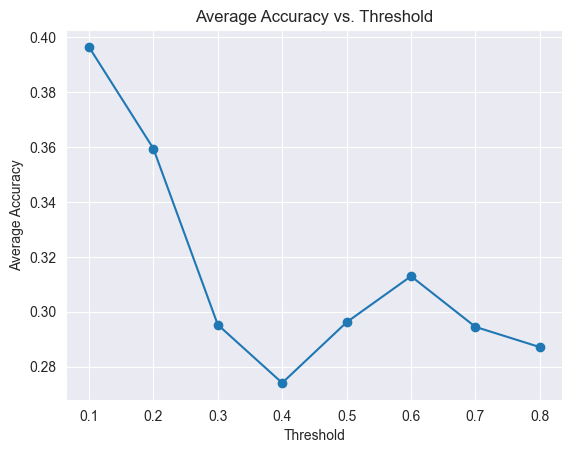

In [18]:

# Group by Threshold and calculate average Accuracy
average_accuracy = result_dataframe.groupby('Threshold')['Accuracy'].mean()

# Plot the average accuracy
plt.plot(average_accuracy.index, average_accuracy.values, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Threshold')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Show the plot
plt.grid(True)
plt.show()
